# <font color=blue>Assignments for "Visualization with Matplotlib"</font>

In this assignment, you will make some plots about Corona. First, download the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data).

- First, filter the data for four countries (Spain, France, Germany, Italy) and the last 100 days. 

- Create a figure with two subplots. The left subplot will show total cases, and the right one will show total deaths for these countries

- Set titles, X and Y labels, change the font, font size, and font color for each subplot.

- Change color, width, and type of lines.

- Put a legend to bottom right.

- Change the color and rotation of the X-axis ticks.

- And set a title for the figure (not for the plots).

Text(0.5, 0.98, 'Corona Cases and Deaths for Some Countries by the dates.')

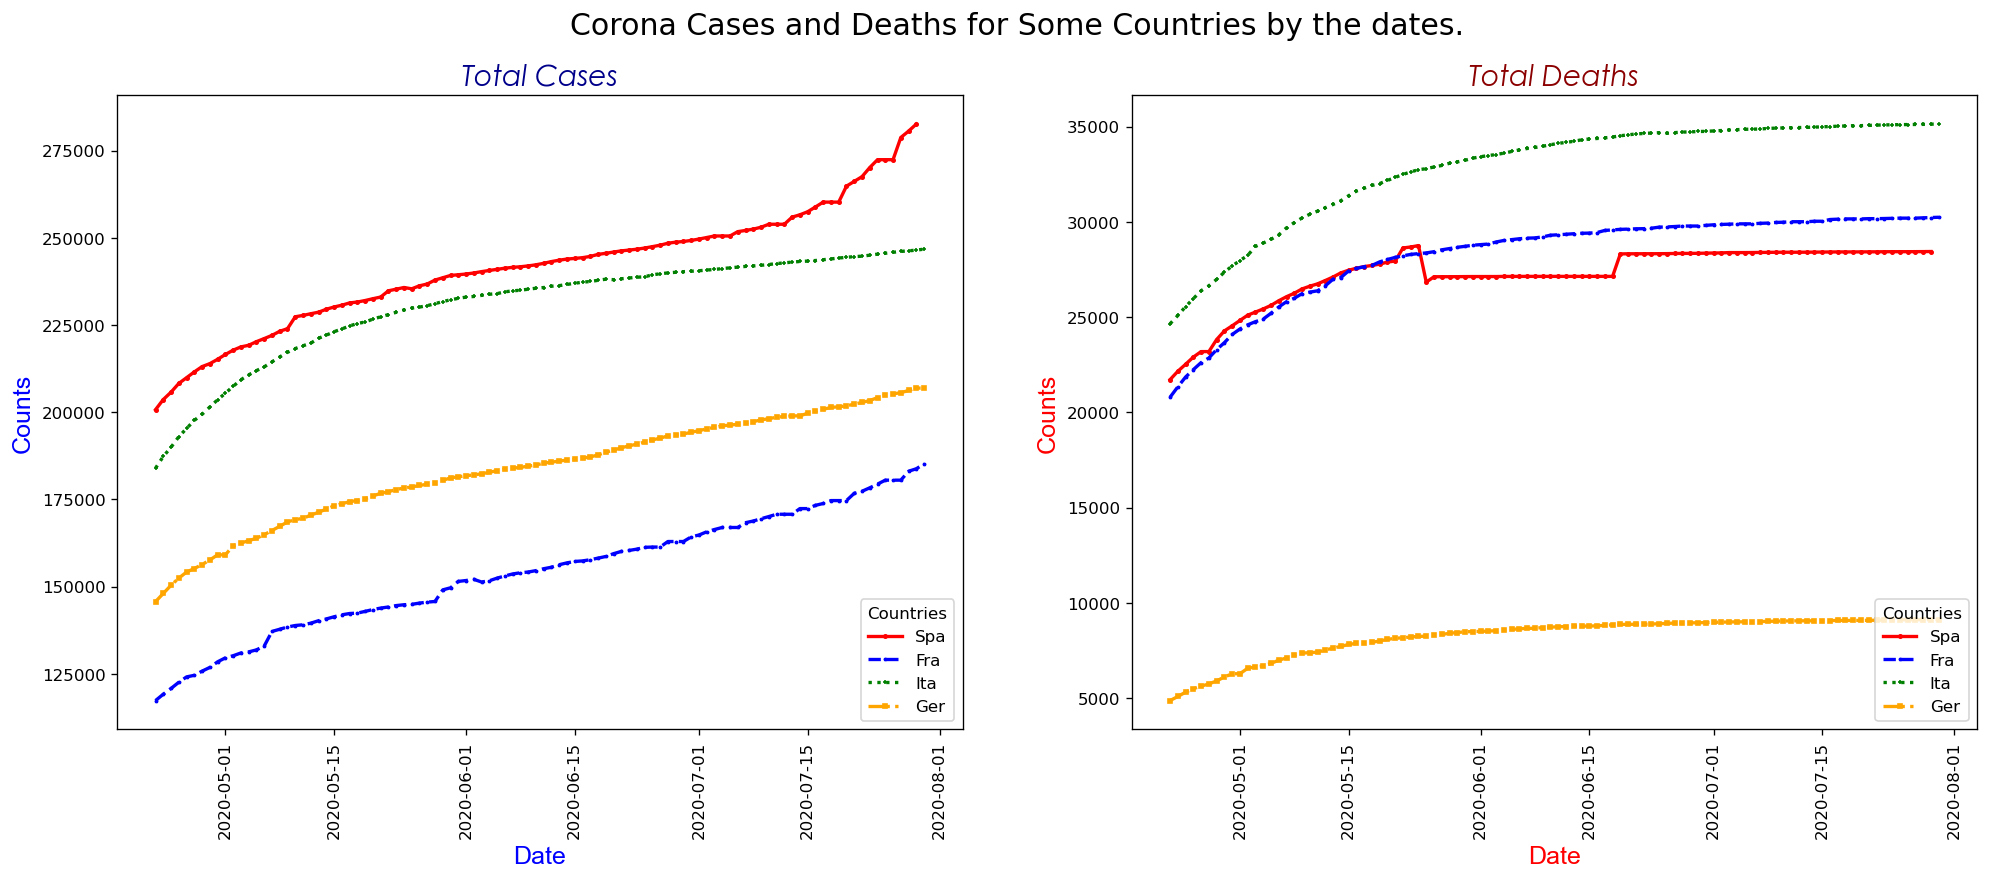

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime

startingFrom=datetime.now()- pd.to_timedelta("100day")
#print(startingFrom)

covid_data=pd.read_csv("owid-covid-data.csv",parse_dates=["date"],low_memory=False)


covid_data_filtered=covid_data[(covid_data.location.isin(["Spain","France","Germany","Italy"]) ) 
            & ( covid_data.date>= startingFrom ) ]

covid_data_filtered.head()

countries=set(covid_data_filtered["location"])
colors=["red","blue","green","orange","black"]

# https://matplotlib.org/3.1.1/api/markers_api.html
markers=["o","*","+","s","p","x","d"] 

#https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
lines=["-","--",":","-.",".","o","v"]

fig=plt.figure(figsize=(20,7),dpi=120)


### SUBPLOT 1 

plt.subplot(1,2,1)

n=0
for country in countries:
    data_for_country=covid_data_filtered[covid_data_filtered.location==country]
    x=data_for_country["date"]
    y=data_for_country["total_cases"]
    color=colors[n]
    marker=markers[n]
    line=lines[n]
    plt.plot(x,y, c = color, marker = marker, markersize = 2, linestyle = line, linewidth = 2,label=country[0:3])
    n+=1

plt.legend(title="Countries",loc=4)
plt.title("Total Cases", fontstyle = 'italic', fontsize = 17,fontweight = 'normal', color = "darkblue",fontfamily = 'Century Gothic')
plt.xlabel("Date", fontstyle = 'normal', fontsize = 15,fontweight = 'normal', color = "blue",fontfamily = 'Arial')
plt.ylabel("Counts",fontstyle = 'normal', fontsize = 15,fontweight = 'normal', color = "blue",fontfamily = 'Arial')
plt.xticks(rotation=90)


### SUBPLOT 2 

plt.subplot(1,2,2)

n=0
for country in countries:
    data_for_country=covid_data_filtered[covid_data_filtered.location==country]
    x=data_for_country["date"]
    y=data_for_country["total_deaths"]
    color=colors[n]
    marker=markers[n]
    line=lines[n]
    plt.plot(x,y, c = color, marker = marker, markersize = 2, linestyle = line, linewidth = 2,label=country[0:3])
    n+=1

plt.legend(title="Countries",loc=4)
plt.title("Total Deaths", fontstyle = 'italic', fontsize = 17,fontweight = 'normal', color = "darkred",fontfamily = 'Century Gothic')
plt.xlabel("Date", fontstyle = 'normal', fontsize = 15,fontweight = 'normal', color = "red",fontfamily = 'Arial')
plt.ylabel("Counts",fontstyle = 'normal', fontsize = 15,fontweight = 'normal', color = "red",fontfamily = 'Arial')
plt.xticks(rotation=90)

fig.suptitle("Corona Cases and Deaths for Some Countries by the dates.",fontsize=18)
